<a href="https://colab.research.google.com/github/annefrancine/ML_2022-2023/blob/main/Yelowbrick_machine_learning_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yellowbrick est un projet Python open source qui englobe les API scikit-learn et matplotlib pour créer des figures prêtes à être publiées et des explorations de données interactives. Il s'agit essentiellement d'une plate-forme de visualisation de diagnostic pour l'apprentissage automatique qui nous permet de piloter le processus de sélection de modèle en aidant à évaluer les performances, la stabilité et la valeur prédictive des modèles d'apprentissage automatique et en aidant davantage à diagnostiquer les problèmes dans notre flux de travail.

**Documentation**: https://www.scikit-yb.org/en/latest/

## Installation
Le moyen le plus simple d'installer Yellowbrick est de PyPI avec pip , le programme d'installation de package préféré de Python.

In [ ]:
!pip install yellowbrick

Le package Yellowbrick tire son nom de l'élément fictif du roman des années 1900, The Wonderful Wizard of Oz. Dans le livre, la route de briques jaunes est le chemin que la protagoniste doit parcourir pour atteindre sa destination dans la ville d'émeraude.

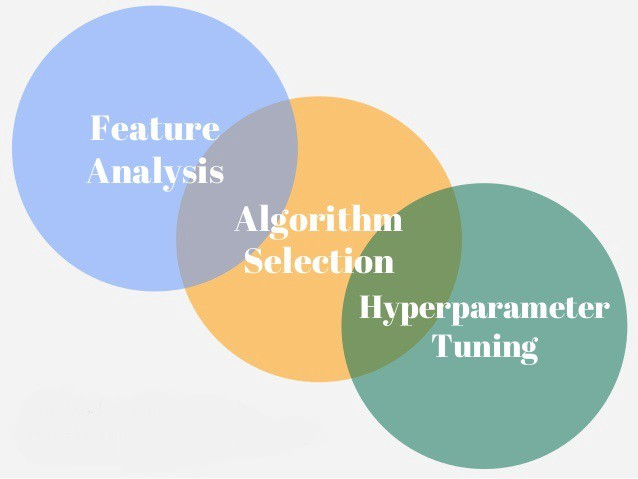

## Utiliser Yellowbrick
L'interface principale de yellowbrick est un Visualizer- un objet qui apprend à partir des données pour produire une visualisation. Les visualiseurs sont des objets Estimator scikit-learn qui ont une interface similaire avec des méthodes de dessin. Pour utiliser les visualiseurs, vous utilisez simplement le même flux de travail qu'avec un modèle scikit-learn, importez le visualiseur, instanciez-le, appelez la fit()méthode du visualiseur , puis pour le rendre, appelez la show()méthode du visualiseur .

## Certains des visualiseurs populaires sont:
* Visualiseurs d'analyse des fonctionnalités
* Visualiseurs cibles
* Visualiseurs de régression
* Visualiseurs de classification
* Visualiseurs de clustering
* Visualiseurs de sélection de modèle
* Visualiseurs de texte

## Visualiseurs d'analyse des fonctionnalités
Les visualiseurs d'analyse des fonctionnalités sont utilisés pour détecter les fonctionnalités ou les cibles susceptibles d'avoir un impact sur l'ajustement en aval. Ici, nous utiliserons les fonctionnalités Rank1Det Rank2Dpour évaluer des fonctionnalités uniques et des paires de fonctionnalités à l'aide de diverses métriques qui évaluent les fonctionnalités sur l'échelle [-1, 1] ou [0, 1].

Un classement unidimensionnel des entités [Rank1D] utilise un algorithme de classement qui ne prend en compte qu'une seule caractéristique à la fois

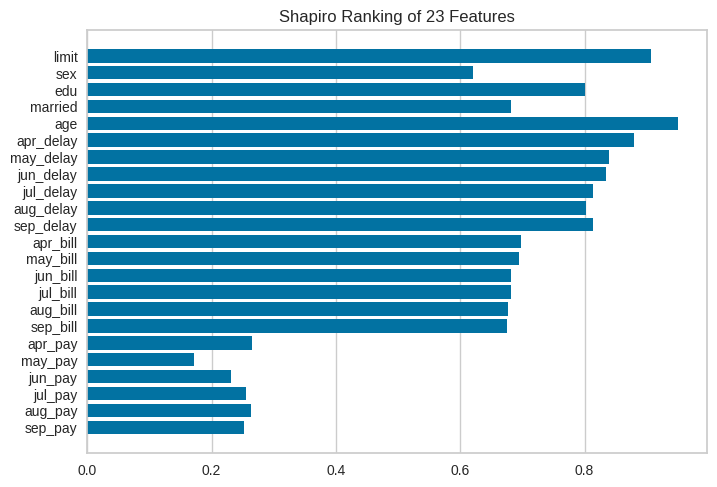

<Axes: title={'center': 'Shapiro Ranking of 23 Features'}>

In [ ]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# charger dataset credit
X, y = load_credit()

# Instanciez le visualiseur 1D avec l'algorithme de classement Sharpiro
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data
visualizer.transform(X)        # Transform  data
visualizer.show()             # Finaliser et rendre la figure
# Remarque : j'ai utilisé les ensembles de données préchargés de Yellowbrick pour implémenter tous les visualiseurs.

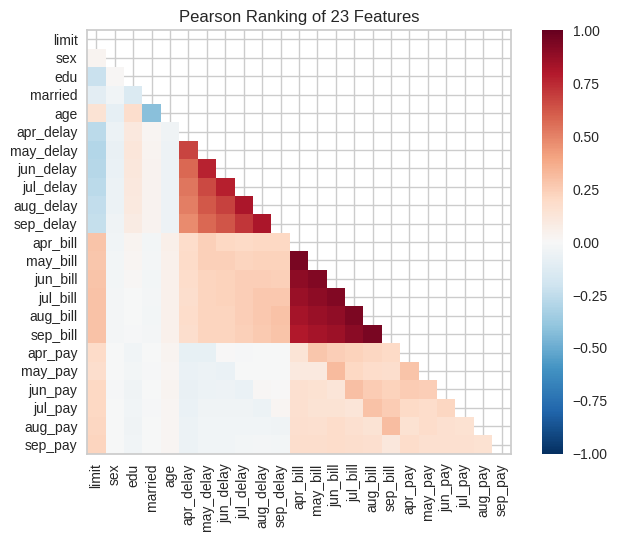

<Axes: title={'center': 'Pearson Ranking of 23 Features'}>

In [ ]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# charger dataset
X, y = load_credit()

# Instanciez le visualiseur avec l'algorithme de classement de Pearson
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finaliser et rendre la figure

Ces visualiseurs se spécialisent dans la description visuelle de la variable dépendante pour la modélisation supervisée, souvent appelée you la cible. Ici, nous allons examiner le visualiseur de balance de classe . Le déséquilibre des classes dans les données de formation est l'un des plus grands défis pour les modèles de classification et avant de commencer à y faire face, il est important de comprendre quel est l'équilibre de classe dans les données de formation.

Le ClassBalancevisualiseur prend en charge cela en créant un diagramme à barres de la prise en charge de chaque classe, qui est la fréquence de représentation des classes dans l'ensemble de données.

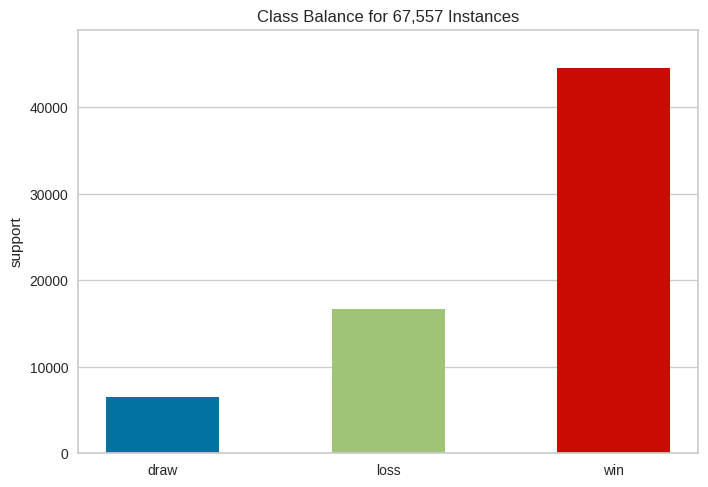

<Axes: title={'center': 'Class Balance for 67,557 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# charger dataset
X, y = load_game()

# Instanciez le visualiseur avec l'algorithme de classement de Pearson
visualizer = ClassBalance(labels=["draw", "loss", "win"])

visualizer.fit(y)        # Fit the data
visualizer.show()        # Finaliser et rendre la figure

Les modèles de régression tentent de prédire une cible dans un espace continu. Les visualiseurs de score de régresseur affichent les instances dans l'espace objet pour nous aider à mieux comprendre comment le modèle effectue des prédictions. Dans ce blog, nous examinerons le graphique d' erreur de prédiction qui trace les valeurs attendues et réelles dans l'espace objet

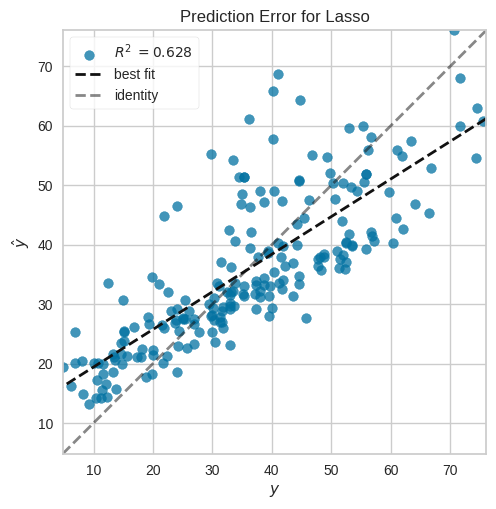

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# charger regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)         # Fit the training data
visualizer.score(X_test, y_test)         # Evaluate the model
visualizer.show()                        # Render the figure

Les modèles de classification tentent de prédire une cible dans un espace discret, auquel une instance de variables dépendantes est affectée à une ou plusieurs catégories. Les visualiseurs de score de classification affichent les différences entre les classes ainsi qu'un certain nombre d'évaluations visuelles spécifiques aux classificateurs.

Nous examinerons le visualiseur de matrice de confusion avec la méthode rapide, confusion_matrix,il construira l' ConfusionMatrixobjet avec les arguments associés, l'ajustera, puis nous pourrons le rendre

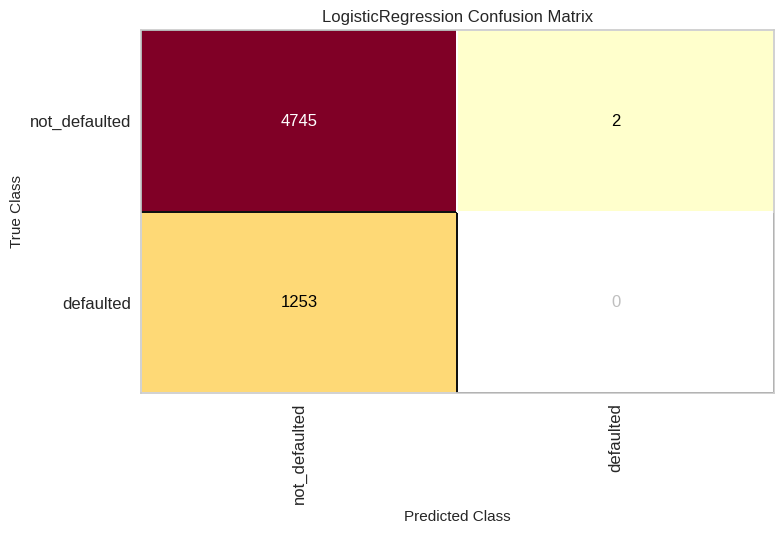

<Figure size 800x550 with 0 Axes>

In [ ]:
from yellowbrick.datasets import load_credit
from yellowbrick.classifier import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

#Load the classification dataset
X, y = load_credit()

#Create the train and test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=['not_defaulted', 'defaulted']
)
plt.tight_layout()

Les modèles de clustering sont des méthodes non supervisées qui tentent de détecter des modèles dans des données non étiquetées. Yellowbrick fournit le yellowbrick.clustermodule pour visualiser et évaluer le comportement de clustering.

Le KElbowVisualizernous aide à sélectionner le nombre optimal de clusters en ajustant le modèle avec une plage de valeurs pour «k». Si le graphique en courbes ressemble à un bras, alors le «coude» (le point d'inflexion sur la courbe) est une bonne indication que le modèle sous-jacent s'adapte le mieux à ce point. Dans ce visualiseur, «coude» sera annoté avec une ligne en pointillés.

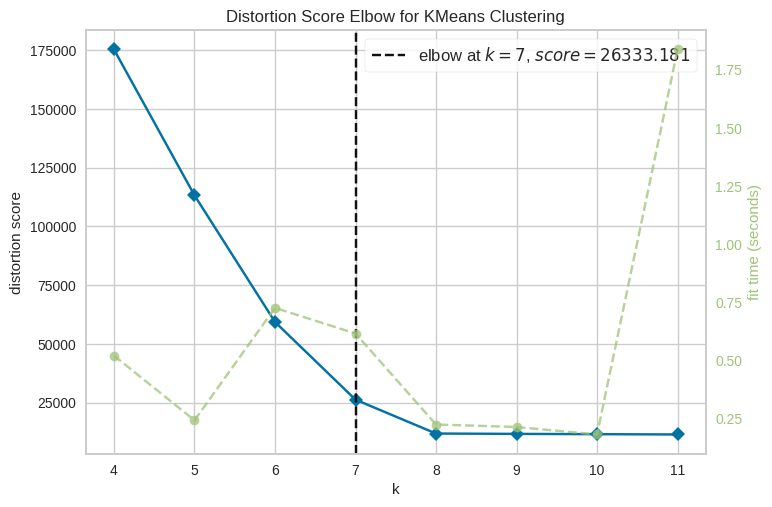

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Le yellowbrick.model_selectionpackage nous fournit des visualiseurs pour inspecter les performances de la validation croisée et du réglage des hyperparamètres. De nombreux visualiseurs encapsulent les fonctionnalités trouvées dans sklearn.model_selectionet d'autres s'appuient sur elle pour effectuer des comparaisons multi-modèles.

La validation de modèle est utilisée pour déterminer l'efficacité d'un estimateur sur les données sur lesquelles il a été formé ainsi que son degré de généralisation à une nouvelle entrée. Pour mesurer les performances d'un modèle, nous avons d'abord divisé l'ensemble de données en fractionnements d'entraînement et de test, en ajustant le modèle sur les données d'entraînement et en le notant sur les données de test réservées. les hyperparamètres du modèle doivent être sélectionnés qui permettent le mieux au modèle de fonctionner dans l'espace de fonctionnalités spécifié pour maximiser son score.

Nous allons explorer l'utilisation du ValidationCurvevisualiseur avec un jeu de données de régression.

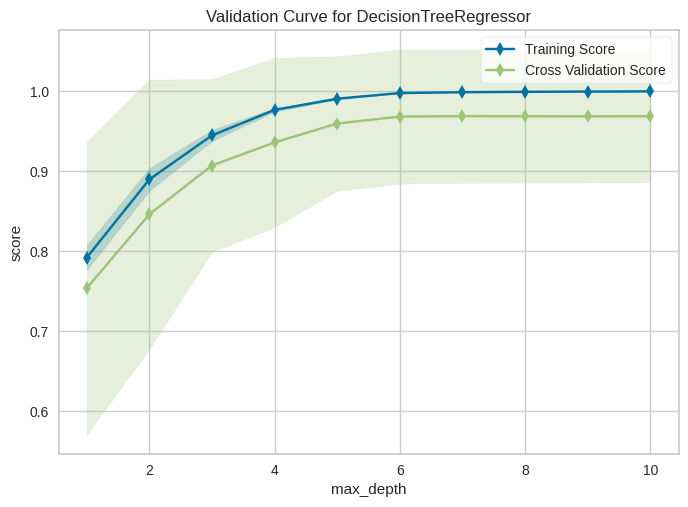

<Axes: title={'center': 'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [ ]:
import numpy as np

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve

from sklearn.tree import DecisionTreeRegressor

# Load a regression dataset
X, y = load_energy()

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

## Features analysis

Les visualiseurs d'analyse de caractéristiques sont conçus pour visualiser les instances dans l'espace des données afin de détecter les caractéristiques ou les cibles qui pourraient avoir un impact sur l'ajustement ultérieur. Étant donné que l'apprentissage automatique fonctionne sur des ensembles de données de grande dimension (généralement au moins 35 dimensions), les visualiseurs se concentrent sur l'agrégation, l'optimisation et d'autres techniques pour donner des aperçus des données. Notre intention est que le processus de pilotage permette au data scientist de zoomer, de filtrer et d'explorer les relations entre leurs instances et entre les dimensions.

À l'heure actuelle, les visualiseurs d'analyse de caractéristiques suivants sont disponibles :

* Visualisation directe des données : tracez la corrélation bidimensionnelle entre les caractéristiques et la cible.
* Coordonnées parallèles : tracez les instances sous forme de lignes le long des axes verticaux pour détecter les classes ou les clusters.
* Projection PCA : projetez des dimensions supérieures dans un espace visuel à l'aide de l'ACP.
* Visualiseur RadViz : tracez les points de données le long des axes disposés autour d'un cercle pour détecter la séparabilité.
* Classement des caractéristiques : classez les caractéristiques individuelles et les paires de caractéristiques pour détecter la covariance.

Les visualiseurs d'analyse de caractéristiques implémentent l'API Transformer de scikit-learn, ce qui signifie qu'ils peuvent être utilisés comme étapes de transformation intermédiaires dans un pipeline (en particulier un VisualPipeline).

Ils sont instanciés de la même manière, puis fit et transform sont appelés sur eux, ce qui dessine correctement les instances

In [ ]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D

In [ ]:
# charger le dataset
X, y = load_credit()

Rank1D et Rank2D évaluent des caractéristiques uniques ou des paires de caractéristiques à l'aide de diverses mesures qui attribuent aux caractéristiques des scores sur l'échelle [-1, 1] ou [0, 1], ce qui permet de les classer. Un concept similaire aux SPLOM (Scatter Plot Matrix), les scores sont visualisés sur une heatmap dans le coin inférieur gauche, de sorte que les motifs entre les paires de caractéristiques puissent être facilement discernés pour une analyse ultérieure.

## Rank1D

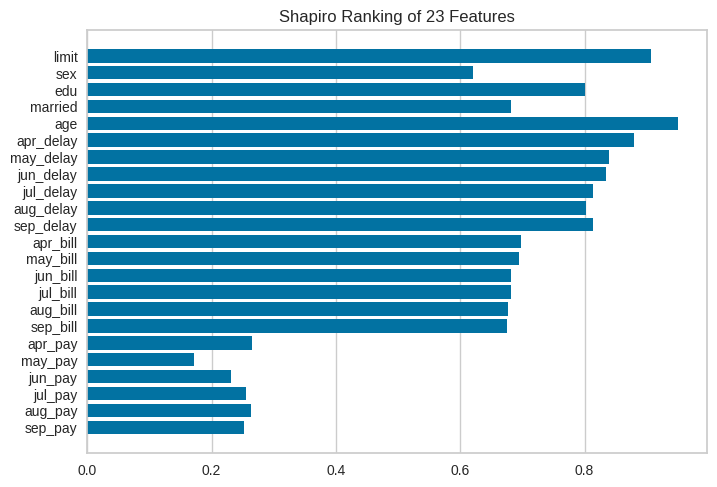

<Axes: title={'center': 'Shapiro Ranking of 23 Features'}>

In [ ]:
# Instancier le visualisateur 1D avec l'algorithme de classement de Shapiro
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit
visualizer.transform(X)        # Transform
visualizer.show()              # Finaliser et rendre la figure

## Rank 2D

In [ ]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

In [ ]:
# charger le dataset
X, y = load_credit()

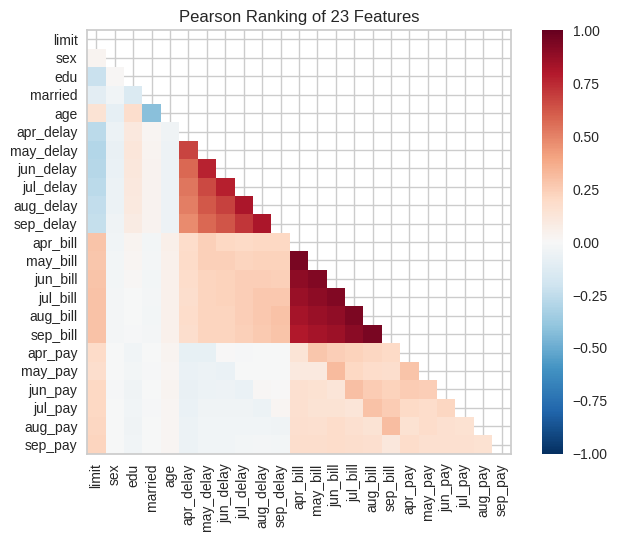

<Axes: title={'center': 'Pearson Ranking of 23 Features'}>

In [ ]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

Alternativement, nous pouvons utiliser l'algorithme de classement par covariance, qui tente de calculer la valeur moyenne du produit des écarts des variables par rapport à leurs moyennes respectives. La covariance tente de manière générale de détecter une relation de colinéarité entre les caractéristiques. Comparez la sortie du coefficient de corrélation de Pearson ci-dessus avec le classement par covariance ci-dessous.

In [ ]:
# Lcharger credit dataset
X, y = load_credit()

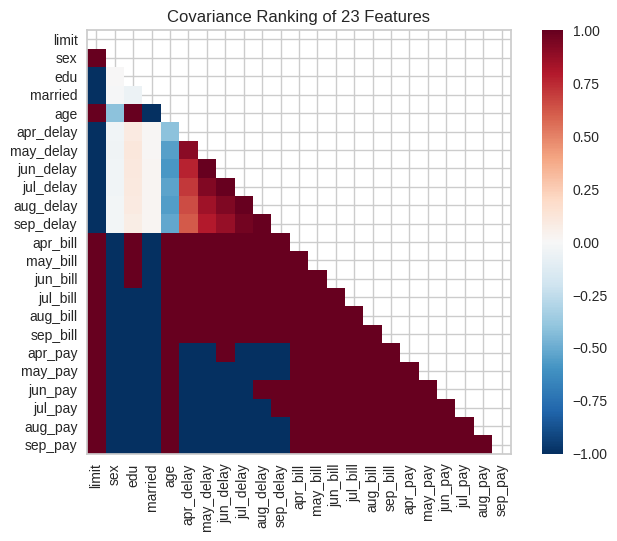

<Axes: title={'center': 'Covariance Ranking of 23 Features'}>

In [ ]:
# Instantiate the visualizer with the covariance ranking algorithm
visualizer = Rank2D(algorithm='covariance')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

Une fonctionnalité similaire peut être obtenue en utilisant les méthodes rapides d'une seule ligne, rank1d et rank2d. Ces fonctions instancient et ajustent leur visualiseur respectif sur les données et l'affichent immédiatement sans avoir à utiliser l'API basée sur les classes.

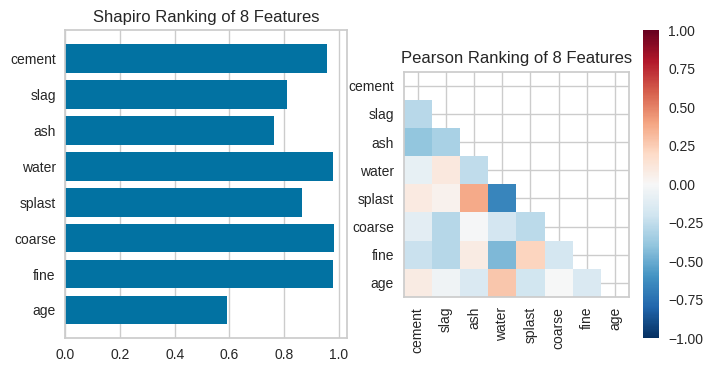

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import rank1d, rank2d
# charger dataset
X, _ = load_concrete()

_, axes = plt.subplots(ncols=2, figsize=(8,4))

rank1d(X, ax=axes[0], show=False)
rank2d(X, ax=axes[1], show=False)
plt.show()

## Cluster

### elbow mthod

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# crér dataset avec  8 r clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

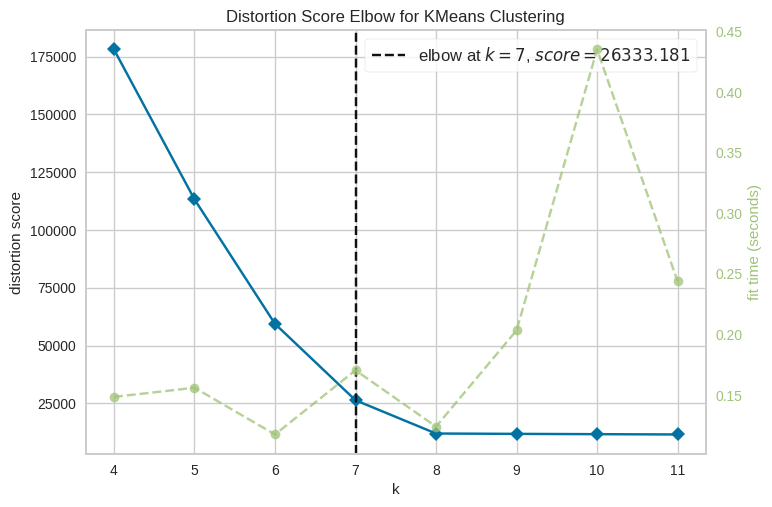

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## silhouette visualizer

Le coefficient de silhouette est utilisé lorsque la vérité terrain concernant le jeu de données est inconnue et il calcule la densité des clusters calculés par le modèle. Le score est calculé en faisant la moyenne du coefficient de silhouette pour chaque échantillon, calculé comme la différence entre la distance intra-cluster moyenne et la distance moyenne au cluster le plus proche pour chaque échantillon, normalisée par la valeur maximale. Cela produit un score entre 1 et -1, où 1 représente des clusters très denses et -1 représente un regroupement complètement incorrect.

Le visualiseur de silhouette affiche le coefficient de silhouette pour chaque échantillon sur une base par cluster, visualisant quels clusters sont denses et lesquels ne le sont pas. Cela est particulièrement utile pour déterminer le déséquilibre des clusters ou pour sélectionner une valeur en comparant plusieurs visualiseurs.

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

In [ ]:
# charger clustering dataset
X, y = load_nfl()

In [ ]:
#définir les features pour le modele de cluster
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
X = X.query('Tgt >= 20')[features]

In [ ]:
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

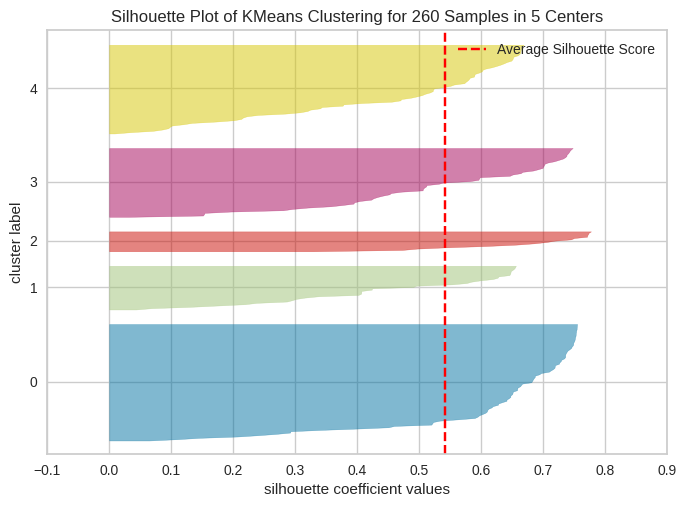

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 260 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure